# Lab06: Logistic Regression and Matrics
---
111062117 黃祥陞

Predict the presence or absence of cardiac arrhythmia in a patient.

## 1. Loading of dataset
The dataset was loaded using `pandas.read_csv()`. The class labels were transformed into a binary classification: `1` for arrhythmia presence and `0` for absence (normal ECG). Non-numeric columns were removed, and the features (X) were extracted from all but the last column, which contains the ground-truth labels (y).

In [122]:
import pandas as pd
import numpy as np

#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

display(data.head(3))

data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)
data = data._get_numeric_data()

X = data.iloc[:, :-1]  # features
y = data.iloc[:, -1]   # ground-truth label

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


## 2. Splitting of dataset to training and testing data (test_size = 20% of the whole dataset)
The dataset was split into training and testing sets using an 80/20 split ratio with `train_test_split()`. The training data was standardized using `StandardScaler()` to ensure that the features have a mean of 0 and a standard deviation of 1. The same scaling parameters were then applied to the test data.

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 3. Building of a self-designed Logistic Regression model (Complete the TODO parts provided below)
A base template for the Logistic Regression model was provided. The TODO parts were completed as follows:

- `loss()`: The cross-entropy loss function was implemented to calculate the error.
- `activation()`: The logistic sigmoid activation function converts the linear combination of inputs (net input) into a probability.
- `predict()`: A threshold of 0.5 was used to classify whether the predicted probability belongs to class 1 or class 0.

In [124]:
class LogisticRegression(object):
    def __init__(self, eta=0.05, n_epoch=100, random_state=1):
        """Feel free to change the hyperparameters"""
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            gradient_weights, gradient_bias = self.gradient(X, output, y)
            self.w_[1:] += self.eta * gradient_weights
            self.w_[0] += self.eta * gradient_bias
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate cross entropy loss"""
        return -np.sum(y * np.log(output) + (1 - y) * np.log(1 - output))

    def gradient(self, X, output, y):
        """Calculate the partial derivative of cross entropy loss with respect to weights"""
        errors = (y - output)
        return errors.dot(X), errors.sum()

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

## 4. Plotting the loss curve
The loss curve was plotted to visualize the convergence. The model was trained with a learning rate ($\eta$=0.0005) and 1000 epochs. The cross-entropy loss was computed at each epoch and plotted to observe how the loss decreased as the model learned.

58.182719841465975


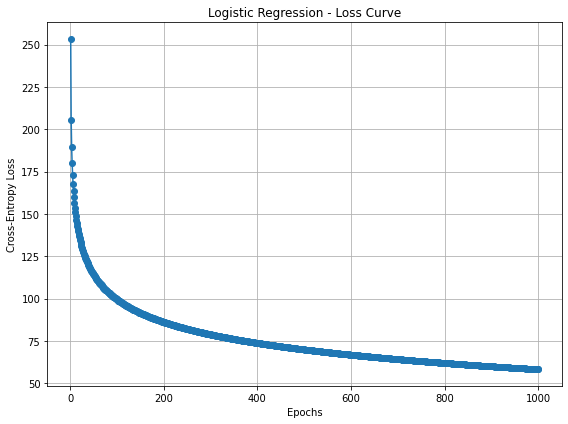

In [125]:
lr = LogisticRegression(eta=0.0005, n_epoch=1000, random_state=1)
lr.fit(X_train_std, y_train)

import matplotlib.pyplot as plt

print(lr.cost_[-1])
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Logistic Regression - Loss Curve')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Plotting of the confusion matrix (Label 0 as positive)
The confusion matrix was plotted to evaluate the performance on the test dataset. It shows the model's true positive, false positive, true negative, and false negative predictions.

[[33 10]
 [ 9 39]]


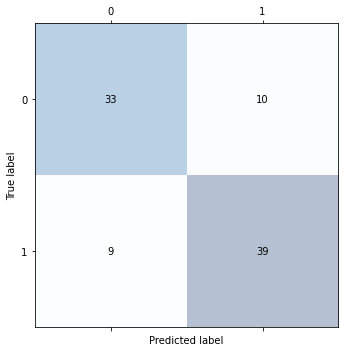

In [126]:
y_pred = lr.predict(X_test_std)

from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

## 6. Computing the F1-score of this confusion matrix. The F1-score should be at least 0.75

The precision, recall, and F1-score were computed to evaluate the model's performance on the test set. In this case, the model achieved a precision of 0.79, a recall of 0.77, and an F1-score of 0.78.

In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true=y_test, y_pred=y_pred, pos_label=0)
recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=0)

print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)
print('F1-Score: %.2f' % f1)

Precision: 0.79
Recall: 0.77
F1-Score: 0.78
